In [3]:
import pandas as pd
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')
data

C:\Users\Asus\AppData\Local\Temp\ipykernel_924\474139866.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,542644,548869,93219,534737,36820,542661,10066,542456,24820,...,543880+543332+542784+530997+530785,535034+535038+542800+543348+543896,543924+543376+542828+535086,542832+542696+543380+543928,543932+542700+542836+543384,547724+543360+547728+543908+547720+542812+547716+531033,543888+542792+543340+531025,543372+543368+543920+543916+542692+542688+542824+542820,543364+543912+542684+542816,8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
0,19910101,216.0400,404.7017,146.25000,281.3800,155.250,214.4300,268.750,204.9100,312.130,...,33122.130000,45839.530000,52842.860000,48596.370000,49887.600000,60081.570000,39845.120000,52658.090000,31296.190000,13.03000
1,19910201,149.0800,421.4927,115.66667,276.2600,95.750,140.6300,280.000,136.6500,307.280,...,56664.570000,73207.630000,89338.320000,80358.930000,85764.820000,81404.760000,68741.690000,80129.440000,54080.590000,13.15000
2,19910301,119.0500,368.1324,86.33333,190.7900,80.800,107.5100,199.200,106.0300,226.210,...,35121.180000,48163.420000,55941.780000,51293.410000,52934.020000,52744.530000,42298.800000,54990.750000,33230.870000,13.20000
3,19910401,121.9400,387.0115,79.66667,200.2700,77.000,110.7000,191.375,108.9800,235.200,...,19576.480000,30092.690000,31844.400000,30321.090000,29244.860000,36829.640000,23218.850000,36851.860000,18186.700000,13.51000
4,19910501,125.7900,462.6200,82.80000,199.6400,78.600,114.9600,197.200,112.9100,234.610,...,34175.280000,47063.810000,54475.450000,50017.240000,51492.530000,58368.520000,41137.780000,53887.000000,32315.440000,13.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,20230901,684.4500,576.0000,568.45000,1024.2000,603.600,711.9000,1054.800,659.7000,1022.900,...,30863.310778,25898.544058,48481.681142,45368.326005,50994.194898,55121.678414,32958.539815,54409.884701,36524.003032,11.51250
393,20231001,660.3750,656.1875,524.37500,970.3125,556.625,700.1250,1014.750,664.6875,973.000,...,42638.283715,50128.701163,63854.584045,65398.069490,70789.307587,65391.097779,45001.265013,72728.810396,49016.415023,11.68875
394,20231101,629.7500,688.1875,489.75000,919.5625,521.875,713.3125,936.125,686.7500,880.875,...,61926.342563,67212.546340,87067.677940,82487.096193,89553.720260,88069.251739,65533.770453,87299.379274,60576.883930,11.88625
395,20231201,588.4500,589.7000,494.65000,868.7500,503.700,681.8500,881.800,615.7000,804.650,...,52011.115747,59195.962123,70954.699113,67922.393093,71746.666697,72573.820342,54569.016270,73118.989011,47718.064695,11.77250


In [4]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

#Splitting the data into training and testing data
#whole data exclude the last row as X
X = data[:-1]

#target columns
good_result1_target_column = data['542236']
good_result2_target_column = data['67321']
mid_result_target_column = data['549295']
bad_result1_target_column = data['41108']
bad_result2_target_column = data['541982']

#target column exclude the first row as y
good1_y = good_result1_target_column[1:]
good2_y = good_result2_target_column[1:] 
mid_y = mid_result_target_column[1:] 
bad1_y = bad_result1_target_column[1:]
bad2_y = bad_result2_target_column[1:]

n = len(X)-36 #number of data points for training and testing

X_train = X.iloc[:n, :] #training data
X_test = X.iloc[n:, :] #testing data

#good1 target column training and testing data
good1_y_train = good1_y.iloc[:n]
good1_y_test = good1_y.iloc[n:]

#good2 target column training and testing data
good2_y_train = good2_y.iloc[:n]
good2_y_test = good2_y.iloc[n:]

#mid target column training and testing data
mid_y_train = mid_y.iloc[:n]
mid_y_test = mid_y.iloc[n:]

#bad1 target column training and testing data
bad1_y_train = bad1_y.iloc[:n]
bad1_y_test = bad1_y.iloc[n:]

#bad2 target column training and testing data
bad2_y_train = bad2_y.iloc[:n]
bad2_y_test = bad2_y.iloc[n:]

#Feature Elimination
# Using DecisionTreeRegressor for feature elimination for normal data
estimator = DecisionTreeRegressor()
selector = RFE(estimator, n_features_to_select=5, step=1)
good1_selector = selector.fit(X_train, good1_y_train)
good2_selector = selector.fit(X_train, good2_y_train)
mid_selector = selector.fit(X_train, mid_y_train)
bad1_selector = selector.fit(X_train, bad1_y_train)
bad2_selector = selector.fit(X_train, bad2_y_train)

#Training and Testing data after feature elimination
good1_X_train = good1_selector.transform(X_train)
good1_X_test = good1_selector.transform(X_test)
good2_X_train = good2_selector.transform(X_train)
good2_X_test = good2_selector.transform(X_test)
mid_X_train = mid_selector.transform(X_train)
mid_X_test = mid_selector.transform(X_test)
bad1_X_train = bad1_selector.transform(X_train)
bad1_X_test = bad1_selector.transform(X_test)
bad2_X_train = bad2_selector.transform(X_train)
bad2_X_test = bad2_selector.transform(X_test)

#Normalization
#get the first column of the data
time = data.iloc[:-1, 0].astype(int)

#Normalize the data
scaledX = data.iloc[:-1, 1:]  # Excluding the last row and first column for dates
scaledX = (scaledX - scaledX.min()) / (scaledX.max() - scaledX.min())

# Assign the 'date' column back as integers
scaledX.insert(0,'Unnamed: 0' ,time)

scaledX_train = scaledX.iloc[:n, :] #scaled training data
scaledX_test = scaledX.iloc[n:, :] #scaled testing data
# print(scaledX_train)
# print(scaledX_test)

#Training and Testing data after feature elimination and normalization
good1_scaledX_train = good1_selector.transform(scaledX_train)
good1_scaledX_test = good1_selector.transform(scaledX_test)
good2_scaledX_train = good2_selector.transform(scaledX_train)
good2_scaledX_test = good2_selector.transform(scaledX_test)
mid_scaledX_train = mid_selector.transform(scaledX_train)
mid_scaledX_test = mid_selector.transform(scaledX_test)
bad1_scaledX_train = bad1_selector.transform(scaledX_train)
bad1_scaledX_test = bad1_selector.transform(scaledX_test)
bad2_scaledX_train = bad2_selector.transform(scaledX_train)
bad2_scaledX_test = bad2_selector.transform(scaledX_test)

#print(X_train)
#print(X_test)
#print(good1_y_train)
print(good1_y_test)
#print(good2_y_train)
#print(good2_y_test)
#print(mid_y_train)
#print(mid_y_test)
#print(bad1_y_train)
#print(bad1_y_test)
#print(bad2_y_train)
#print(bad2_y_test)

print("X_train_Head: ", X_train.iloc[0,0])
print("X_train_Tail: ", X_train.iloc[-1,0])
print("X_test_Head: ", X_test.iloc[0,0])
print("X_test_Tail: ", X_test.iloc[-1,0])


361    26312.5
362    25187.5
363    25000.0
364    25000.0
365    24750.0
366    23300.0
367    23000.0
368    22875.0
369    26350.0
370    27312.5
371    23750.0
372    22750.0
373    21375.0
374    22437.5
375    23000.0
376    22500.0
377    22500.0
378    22900.0
379    29562.5
380    43250.0
381    48187.5
382    53062.5
383    50600.0
384    46625.0
385    45750.0
386    57650.0
387    52062.5
388    43875.0
389    44150.0
390    44375.0
391    47062.5
392    49000.0
393    46875.0
394    51250.0
395    50000.0
396    50250.0
Name: 542236, dtype: float64
X_train_Head:  19910101
X_train_Tail:  20201201
X_test_Head:  20210101
X_test_Tail:  20231201


In [49]:
#Create lagged X dataset
# Create a new DataFrame for lagged data
lagged_features = []

# Loop over the dataset starting from the second row to the second last row
for i in range(1, len(data) - 1):  # Stop before the last row to exclude last two from features
    # Concatenate the current row and the previous row
    current_row = data.iloc[i, :].tolist()
    previous_row = data.iloc[i - 1, :].tolist()
    lagged_row = previous_row + current_row
    lagged_features.append(lagged_row)

# Convert the list to a DataFrame
X_lag1 = pd.DataFrame(lagged_features)

lag_n = len(X_lag1)-36 #number of data points for training and testing

X_lag1_train = X_lag1.iloc[:lag_n, :] #training data
X_lag1_test = X_lag1.iloc[lag_n:, :] #testing data

#Create lagged y dataset
#exclude the first two rows
good1_y_lag1 = good_result1_target_column[2:]
good2_y_lag1 = good_result2_target_column[2:]
mid_y_lag1 = mid_result_target_column[2:]
bad1_y_lag1 = bad_result1_target_column[2:]
bad2_y_lag1 = bad_result2_target_column[2:]

#Splitting the lagged data into training and testing data
X_lag1_train = X_lag1.iloc[:lag_n, :] #training data
X_lag1_test = X_lag1.iloc[lag_n:, :] #testing data

#good1 target column training and testing data
good1_y_lag1_train = good1_y_lag1.iloc[:lag_n]
good1_y_lag1_test = good1_y_lag1.iloc[lag_n:]

#good2 target column training and testing data
good2_y_lag1_train = good2_y_lag1.iloc[:lag_n]
good2_y_lag1_test = good2_y_lag1.iloc[lag_n:]

#mid target column training and testing data
mid_y_lag1_train = mid_y_lag1.iloc[:lag_n]
mid_y_lag1_test = mid_y_lag1.iloc[lag_n:]

#bad1 target column training and testing data
bad1_y_lag1_train = bad1_y_lag1.iloc[:lag_n]
bad1_y_lag1_test = bad1_y_lag1.iloc[lag_n:]

#bad2 target column training and testing data
bad2_y_lag1_train = bad2_y_lag1.iloc[:lag_n]
bad2_y_lag1_test = bad2_y_lag1.iloc[lag_n:]

#Feature Elimination
# Using DecisionTreeRegressor for feature elimination for lagged data
estimator = DecisionTreeRegressor()
selector = RFE(estimator, n_features_to_select=5, step=1)
good1_lag1_selector = selector.fit(X_lag1_train, good1_y_lag1_train)
good2_lag1_selector = selector.fit(X_lag1_train, good2_y_lag1_train)
mid_lag1_selector = selector.fit(X_lag1_train, mid_y_lag1_train)
bad1_lag1_selector = selector.fit(X_lag1_train, bad1_y_lag1_train)
bad2_lag1_selector = selector.fit(X_lag1_train, bad2_y_lag1_train)

#Training and Testing data after feature elimination
good1_lag1_X_train = good1_lag1_selector.transform(X_lag1_train)
good1_lag1_X_test = good1_lag1_selector.transform(X_lag1_test)
good2_lag1_X_train = good2_lag1_selector.transform(X_lag1_train)
good2_lag1_X_test = good2_lag1_selector.transform(X_lag1_test)
mid_lag1_X_train = mid_lag1_selector.transform(X_lag1_train)
mid_lag1_X_test = mid_lag1_selector.transform(X_lag1_test)
bad1_lag1_X_train = bad1_lag1_selector.transform(X_lag1_train)
bad1_lag1_X_test = bad1_lag1_selector.transform(X_lag1_test)
bad2_lag1_X_train = bad2_lag1_selector.transform(X_lag1_train)
bad2_lag1_X_test = bad2_lag1_selector.transform(X_lag1_test)

#Normalization for lagged data
scaled_lagged_features = []

# Loop over the dataset starting from the second row to the second last row
for i in range(1, len(data) - 1):  # Stop before the last row to exclude last two from features
    # Concatenate the current row and the previous row
    current_row = scaledX.iloc[i, :].tolist()
    previous_row = scaledX.iloc[i - 1, :].tolist()
    lagged_row = previous_row + current_row
    scaled_lagged_features.append(lagged_row)

# Convert the list to a DataFrame
scaledX_lag1 = pd.DataFrame(scaled_lagged_features)

scaledX_lag1_train = scaledX_lag1.iloc[:lag_n, :] #training data
scaledX_lag1_test = scaledX_lag1.iloc[lag_n:, :] #testing data
#print(scaledX_lag1_train)
#print(scaledX_lag1_test)

#Training and Testing data after feature elimination and normalization for lagged data
good1_lag1_scaledX_train = good1_lag1_selector.transform(scaledX_lag1_train)
good1_lag1_scaledX_test = good1_lag1_selector.transform(scaledX_lag1_test)
good2_lag1_scaledX_train = good2_lag1_selector.transform(scaledX_lag1_train)
good2_lag1_scaledX_test = good2_lag1_selector.transform(scaledX_lag1_test)
mid_lag1_scaledX_train = mid_lag1_selector.transform(scaledX_lag1_train)
mid_lag1_scaledX_test = mid_lag1_selector.transform(scaledX_lag1_test)
bad1_lag1_scaledX_train = bad1_lag1_selector.transform(scaledX_lag1_train)
bad1_lag1_scaledX_test = bad1_lag1_selector.transform(scaledX_lag1_test)
bad2_lag1_scaledX_train = bad2_lag1_selector.transform(scaledX_lag1_train)
bad2_lag1_scaledX_test = bad2_lag1_selector.transform(scaledX_lag1_test)

print("X_lag1_train_Head: ", X_lag1_train.iloc[0,0])
print("X_lag1_train_Tail: ", X_lag1_train.iloc[-1,0])
print("X_lag1_test_Head: ", X_lag1_test.iloc[0,0])
print("X_lag1_test_Tail: ", X_lag1_test.iloc[-1,0])
#print(good1_y_lag1_test)
#print(good1_y_lag1_train)

X_lag1_train_Head:  19910101.0
X_lag1_train_Tail:  20201101.0
X_lag1_test_Head:  20201201.0
X_lag1_test_Tail:  20231101.0


In [50]:
# The models we use to do the prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

def model_fit_predict(X_train, X_test, eliminatedX_train, eliminatedX_test, scaledX_train, scaledX_test, eliminatedScaledX_train, eliminatedScaledX_test, y_train):
    predictions = {}  # Initialize an empty dictionary

    # Decision Tree Regressor
    #Noraml Data set
    DT = DecisionTreeRegressor(random_state=42)
    DT.fit(X_train, y_train)
    predictions['DT'] = DT.predict(X_test)

    #After Feature Elimination Data set
    EliminatedDT = DecisionTreeRegressor(random_state=42)
    EliminatedDT.fit(eliminatedX_train, y_train)
    predictions['Eliminated DT'] = EliminatedDT.predict(eliminatedX_test)

    #After Normalization Data set
    ScaledDT = DecisionTreeRegressor(random_state=42)
    ScaledDT.fit(scaledX_train, y_train)
    predictions['Scaled DT'] = ScaledDT.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledDT = DecisionTreeRegressor(random_state=42)
    EliminatedScaledDT.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled DT'] = EliminatedScaledDT.predict(eliminatedScaledX_test)

    # Linear Regression
    #Noraml Data set
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions['LR'] = LR.predict(X_test)

    #After Feature Elimination Data set
    EliminatedLR = LinearRegression()
    EliminatedLR.fit(eliminatedX_train, y_train)
    predictions['Eliminated LR'] = EliminatedLR.predict(eliminatedX_test)
    
    #After Normalization Data set
    ScaledLR = LinearRegression()
    ScaledLR.fit(scaledX_train, y_train)
    predictions['Scaled LR'] = ScaledLR.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledLR = LinearRegression()
    EliminatedScaledLR.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled LR'] = EliminatedScaledLR.predict(eliminatedScaledX_test)

    # Lasso Regression
    #Noraml Data set
    Lasso_model = Lasso(alpha=0.1)
    Lasso_model.fit(X_train, y_train)
    predictions['Lasso'] = Lasso_model.predict(X_test)

    #After Feature Elimination Data set
    EliminatedLasso_model = Lasso(alpha=0.1)
    EliminatedLasso_model.fit(eliminatedX_train, y_train)
    predictions['Eliminated Lasso'] = EliminatedLasso_model.predict(eliminatedX_test)
    
    #After Normalization Data set
    ScaledLasso_model = Lasso(alpha=0.1)
    ScaledLasso_model.fit(scaledX_train, y_train)
    predictions['Scaled Lasso'] = ScaledLasso_model.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledLasso_model = Lasso(alpha=0.1)
    EliminatedScaledLasso_model.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled Lasso'] = EliminatedScaledLasso_model.predict(eliminatedScaledX_test)

    # Support Vector Regression
    #Noraml Data set
    SVR_model = SVR()
    SVR_model.fit(X_train, y_train)
    predictions['SVR'] = SVR_model.predict(X_test)

    #After Feature Elimination Data set
    EliminatedSVR_model = SVR()
    EliminatedSVR_model.fit(eliminatedX_train, y_train)
    predictions['Eliminated SVR'] = EliminatedSVR_model.predict(eliminatedX_test)
   
    #After Normalization Data set
    ScaledSVR_model = SVR()
    ScaledSVR_model.fit(scaledX_train, y_train)
    predictions['Scaled SVR'] = ScaledSVR_model.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledSVR_model = SVR()
    EliminatedScaledSVR_model.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled SVR'] = EliminatedScaledSVR_model.predict(eliminatedScaledX_test)

    # Multi-Layer Perceptron Regressor
    #Noraml Data set
    MLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    MLP.fit(X_train, y_train)
    predictions['MLP'] = MLP.predict(X_test)

    #After Feature Elimination Data set
    EliminatedMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    EliminatedMLP.fit(eliminatedX_train, y_train)
    predictions['Eliminated MLP'] = EliminatedMLP.predict(eliminatedX_test)
   
    #After Normalization Data set
    ScaledMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    ScaledMLP.fit(scaledX_train, y_train)
    predictions['Scaled MLP'] = ScaledMLP.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    EliminatedScaledMLP.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled MLP'] = EliminatedScaledMLP.predict(eliminatedScaledX_test)

    # Gradient Boosting Regressor
    #Noraml Data set
    GBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    GBR.fit(X_train, y_train)
    predictions['GBR'] = GBR.predict(X_test)

    #After Feature Elimination Data set
    EliminatedGBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    EliminatedGBR.fit(eliminatedX_train, y_train)
    predictions['Eliminated GBR'] = EliminatedGBR.predict(eliminatedX_test)

    #After Normalization Data set
    ScaledGBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    ScaledGBR.fit(scaledX_train, y_train)
    predictions['Scaled GBR'] = ScaledGBR.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledGBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    EliminatedScaledGBR.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled GBR'] = EliminatedScaledGBR.predict(eliminatedScaledX_test)

    # Random Forest Regressor
    #Noraml Data set
    RFR = RandomForestRegressor(random_state=42)
    RFR.fit(X_train, y_train)
    predictions['RFR'] = RFR.predict(X_test)

    #After Feature Elimination Data set
    EliminatedRFR = RandomForestRegressor(random_state=42)
    EliminatedRFR.fit(eliminatedX_train, y_train)
    predictions['Eliminated RFR'] = EliminatedRFR.predict(eliminatedX_test)

    #After Normalization Data set
    ScaledRFR = RandomForestRegressor(random_state=42)
    ScaledRFR.fit(scaledX_train, y_train)
    predictions['Scaled RFR'] = ScaledRFR.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledRFR = RandomForestRegressor(random_state=42)
    EliminatedScaledRFR.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled RFR'] = EliminatedScaledRFR.predict(eliminatedScaledX_test)

    #Ridge Regression
    #Noraml Data set
    RR = Ridge(alpha=0.1)
    RR.fit(X_train, y_train)
    predictions['RR'] = RR.predict(X_test)

    #After Feature Elimination Data set
    EliminatedRR = Ridge(alpha=0.1)
    EliminatedRR.fit(eliminatedX_train, y_train)
    predictions['Eliminated RR'] = EliminatedRR.predict(eliminatedX_test)
    
    #After Normalization Data set
    ScaledRR = Ridge(alpha=0.1)
    ScaledRR.fit(scaledX_train, y_train)
    predictions['Scaled RR'] = ScaledRR.predict(scaledX_test)

    #After Feature Elimination and Normalization Data set
    EliminatedScaledRR = Ridge(alpha=0.1)
    EliminatedScaledRR.fit(eliminatedScaledX_train, y_train)
    predictions['Eliminated Scaled RR'] = EliminatedScaledRR.predict(eliminatedScaledX_test)

    return predictions

good1_predictions = model_fit_predict(X_train, X_test, good1_X_train, good1_X_test, scaledX_train, scaledX_test, good1_scaledX_train, good1_scaledX_test, good1_y_train)
good2_predictions = model_fit_predict(X_train, X_test, good2_X_train, good2_X_test, scaledX_train, scaledX_test, good2_scaledX_train, good2_scaledX_test, good2_y_train)
mid_predictions = model_fit_predict(X_train, X_test, mid_X_train, mid_X_test, scaledX_train, scaledX_test, mid_scaledX_train, mid_scaledX_test, mid_y_train)
bad1_predictions = model_fit_predict(X_train, X_test, bad1_X_train, bad1_X_test, scaledX_train, scaledX_test, bad1_scaledX_train, bad1_scaledX_test, bad1_y_train)
bad2_predictions = model_fit_predict(X_train, X_test, bad2_X_train, bad2_X_test, scaledX_train, scaledX_test, bad2_scaledX_train, bad2_scaledX_test, bad2_y_train)

print(good1_predictions)
# print(good2_predictions)
# print(mid_predictions)
# print(bad1_predictions)
# print(bad2_predictions)





c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.546e+08, tolerance: 8.337e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.622e+08, tolerance: 8.337e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converge

{'DT': array([26190.52, 26190.52, 25924.44, 26190.52, 23370.15, 26190.52,
       26190.52, 27437.5 , 27437.5 , 25073.01, 28510.48, 27437.5 ,
       27437.5 , 27437.5 , 23370.15, 25073.01, 27437.5 , 28510.48,
       28510.48, 33000.  , 40000.  , 44355.77, 64904.01, 40159.3 ,
       50875.  , 60000.  , 64904.01, 40159.3 , 40000.  , 40000.  ,
       41356.63, 40159.3 , 64904.01, 40159.3 , 64904.01, 64904.01]), 'Eliminated DT': array([26700.  , 26700.  , 26700.  , 26700.  , 26700.  , 26531.25,
       26700.  , 22798.1 , 26456.59, 36141.61, 36141.61, 26456.59,
       22199.43, 22199.43, 31245.89, 60000.  , 31245.89, 24061.94,
       60000.  , 41187.5 , 32600.  , 36625.  , 43485.21, 56256.67,
       34600.  , 60000.  , 32600.  , 60000.  , 33693.75, 60000.  ,
       32735.89, 34600.  , 34600.  , 31458.74, 60000.  , 60000.  ]), 'Scaled DT': array([25924.44, 25924.44, 25073.01, 25924.44, 25073.01, 25073.01,
       26190.52, 29437.5 , 29437.5 , 25924.44, 29437.5 , 29437.5 ,
       29437.5 , 2943

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [51]:
# The models we use to do the prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

def model_fit_predict(lag1X_train, lag1X_test, eliminatedLag1X_train, eliminatedLag1X_test, scaledLag1X_train, scaledLag1X_test, eliminatedScaledLag1X_train, eliminatedScaledLag1X_test, lag1y_train):

    lagged_predictions = {}  # Initialize an empty dictionary

    # Decision Tree Regressor
    # Lagged Data set
    LaggedDT = DecisionTreeRegressor(random_state=42)
    LaggedDT.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged DT'] = LaggedDT.predict(lag1X_test)

    #After Feature Elimination Lag Data set
    EliminatedLaggedDT = DecisionTreeRegressor(random_state=42)
    EliminatedLaggedDT.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged DT'] = EliminatedLaggedDT.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedDT = DecisionTreeRegressor(random_state=42)
    ScaledLaggedDT.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged DT'] = ScaledLaggedDT.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedDT = DecisionTreeRegressor(random_state=42)
    EliminatedScaledLaggedDT.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged DT'] = EliminatedScaledLaggedDT.predict(eliminatedScaledLag1X_test)

    # Linear Regression
    # Lagged Data set
    LaggedLR = LinearRegression()
    LaggedLR.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged LR'] = LaggedLR.predict(lag1X_test)

    #After Feature Elimination Lag Data set
    EliminatedLaggedLR = LinearRegression()
    EliminatedLaggedLR.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged LR'] = EliminatedLaggedLR.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedLR = LinearRegression()
    ScaledLaggedLR.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged LR'] = ScaledLaggedLR.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedLR = LinearRegression()
    EliminatedScaledLaggedLR.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged LR'] = EliminatedScaledLaggedLR.predict(eliminatedScaledLag1X_test)

    # Lasso Regression
    # Lagged Data set
    LaggedLasso_model = Lasso(alpha=0.1)
    LaggedLasso_model.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged Lasso'] = LaggedLasso_model.predict(lag1X_test)

    #After Feature Elimination Lag Data set
    EliminatedLaggedLasso_model = Lasso(alpha=0.1)
    EliminatedLaggedLasso_model.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged Lasso'] = EliminatedLaggedLasso_model.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedLasso_model = Lasso(alpha=0.1)
    ScaledLaggedLasso_model.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged Lasso'] = ScaledLaggedLasso_model.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedLasso_model = Lasso(alpha=0.1)
    EliminatedScaledLaggedLasso_model.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged Lasso'] = EliminatedScaledLaggedLasso_model.predict(eliminatedScaledLag1X_test)

    # Support Vector Regression
    # Lagged Data set
    LaggedSVR_model = SVR()
    LaggedSVR_model.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged SVR'] = LaggedSVR_model.predict(lag1X_test)
    
    #After Feature Elimination Lag Data set
    EliminatedLaggedSVR_model = SVR()
    EliminatedLaggedSVR_model.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged SVR'] = EliminatedLaggedSVR_model.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedSVR_model = SVR()
    ScaledLaggedSVR_model.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged SVR'] = ScaledLaggedSVR_model.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedSVR_model = SVR()
    EliminatedScaledLaggedSVR_model.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged SVR'] = EliminatedScaledLaggedSVR_model.predict(eliminatedScaledLag1X_test)

    # Multi-Layer Perceptron Regressor
    # Lagged Data set
    LaggedMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    LaggedMLP.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged MLP'] = LaggedMLP.predict(lag1X_test)

    #After Feature Elimination Lag Data set
    EliminatedLaggedMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    EliminatedLaggedMLP.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged MLP'] = EliminatedLaggedMLP.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    ScaledLaggedMLP.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged MLP'] = ScaledLaggedMLP.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    EliminatedScaledLaggedMLP.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged MLP'] = EliminatedScaledLaggedMLP.predict(eliminatedScaledLag1X_test)

    # Gradient Boosting Regressor
    # Lagged Data set
    LaggedGBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    LaggedGBR.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged GBR'] = LaggedGBR.predict(lag1X_test)

    #After Feature Elimination Lag Data set
    EliminatedLaggedGBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    EliminatedLaggedGBR.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged GBR'] = EliminatedLaggedGBR.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedGBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    ScaledLaggedGBR.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged GBR'] = ScaledLaggedGBR.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedGBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
    EliminatedScaledLaggedGBR.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged GBR'] = EliminatedScaledLaggedGBR.predict(eliminatedScaledLag1X_test)

    # Random Forest Regressor
    # Lagged Data set
    LaggedRFR = RandomForestRegressor(random_state=42)
    LaggedRFR.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged RFR'] = LaggedRFR.predict(lag1X_test)

    #After Feature Elimination Lag Data set
    EliminatedLaggedRFR = RandomForestRegressor(random_state=42)
    EliminatedLaggedRFR.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged RFR'] = EliminatedLaggedRFR.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedRFR = RandomForestRegressor(random_state=42)
    ScaledLaggedRFR.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged RFR'] = ScaledLaggedRFR.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedRFR = RandomForestRegressor(random_state=42)
    EliminatedScaledLaggedRFR.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged RFR'] = EliminatedScaledLaggedRFR.predict(eliminatedScaledLag1X_test)
    
    #Ridge Regression
    # Lagged Data set
    LaggedRR = Ridge(alpha=0.1)
    LaggedRR.fit(lag1X_train, lag1y_train)
    lagged_predictions['Lagged RR'] = LaggedRR.predict(lag1X_test)

    #After Feature Elimination Lag Data set
    EliminatedLaggedRR = Ridge(alpha=0.1)
    EliminatedLaggedRR.fit(eliminatedLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Lagged RR'] = EliminatedLaggedRR.predict(eliminatedLag1X_test)

    #After Normalization Lag Data set
    ScaledLaggedRR = Ridge(alpha=0.1)
    ScaledLaggedRR.fit(scaledLag1X_train, lag1y_train)
    lagged_predictions['Scaled Lagged RR'] = ScaledLaggedRR.predict(scaledLag1X_test)

    #After Feature Elimination and Normalization Lag Data set
    EliminatedScaledLaggedRR = Ridge(alpha=0.1)
    EliminatedScaledLaggedRR.fit(eliminatedScaledLag1X_train, lag1y_train)
    lagged_predictions['Eliminated Scaled Lagged RR'] = EliminatedScaledLaggedRR.predict(eliminatedScaledLag1X_test)

    return lagged_predictions

good1_lag1_predictions = model_fit_predict(X_lag1_train, X_lag1_test, good1_lag1_X_train, good1_lag1_X_test, scaledX_lag1_train, scaledX_lag1_test, good1_lag1_scaledX_train, good1_lag1_scaledX_test, good1_y_lag1_train)
good2_lag1_predictions = model_fit_predict(X_lag1_train, X_lag1_test, good2_lag1_X_train, good2_lag1_X_test, scaledX_lag1_train, scaledX_lag1_test, good2_lag1_scaledX_train, good2_lag1_scaledX_test, good2_y_lag1_train)
mid_lag1_predictions = model_fit_predict(X_lag1_train, X_lag1_test, mid_lag1_X_train, mid_lag1_X_test, scaledX_lag1_train, scaledX_lag1_test, mid_lag1_scaledX_train, mid_lag1_scaledX_test, mid_y_lag1_train)
bad1_lag1_predictions = model_fit_predict(X_lag1_train, X_lag1_test, bad1_lag1_X_train, bad1_lag1_X_test, scaledX_lag1_train, scaledX_lag1_test, bad1_lag1_scaledX_train, bad1_lag1_scaledX_test, bad1_y_lag1_train)
bad2_lag1_predictions = model_fit_predict(X_lag1_train, X_lag1_test, bad2_lag1_X_train, bad2_lag1_X_test, scaledX_lag1_train, scaledX_lag1_test, bad2_lag1_scaledX_train, bad2_lag1_scaledX_test, bad2_y_lag1_train)

print(good1_lag1_predictions)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.343e+07, tolerance: 8.329e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_r

{'Lagged DT': array([27437.5 , 22798.1 , 23150.  , 23150.  , 23263.72, 23375.  ,
       23150.  , 24061.94, 24061.94, 24061.94, 23550.  , 22798.1 ,
       23375.  , 23375.  , 22798.1 , 22798.1 , 22798.1 , 26700.  ,
       27500.  , 33000.  , 40000.  , 45480.75, 65303.12, 42000.  ,
       48274.5 , 48274.5 , 62110.26, 42000.  , 37631.62, 37631.62,
       37631.62, 41995.2 , 57320.96, 37631.62, 60247.75, 65303.12]), 'Eliminated Lagged DT': array([28550.  , 28550.  , 28550.  , 28550.  , 28550.  , 28550.  ,
       26531.25, 23370.15, 26531.25, 23968.75, 50875.  , 29117.31,
       28550.  , 28550.  , 50875.  , 32576.25, 50875.  , 50875.  ,
       45625.  , 63041.51, 62243.29, 40159.3 , 46545.04, 50935.23,
       50875.  , 52531.66, 62243.29, 53595.95, 50875.  , 45625.  ,
       50875.  , 50875.  , 50875.  , 32177.14, 32576.25, 32177.14]), 'Scaled Lagged DT': array([27500.  , 22798.1 , 23150.  , 23150.  , 23263.72, 23375.  ,
       23150.  , 24061.94, 24061.94, 24061.94, 23550.  , 22798.1 ,


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [52]:
import numpy as np
def calculate_accuracies(predictions, y_test):
    average_accuracies = {}
    individual_accuracies = {}

    for model, model_predictions in predictions.items():
        # Calculate accuracy for each prediction
        accuracies = (1 - np.abs(model_predictions - y_test) / y_test) * 100

        # Calculate average accuracy for the model
        average_accuracy = np.mean(accuracies)

        # Store the average accuracy, rounded to two decimal places
        average_accuracies[model] = round(average_accuracy, 2)

        # Store individual accuracies
        individual_accuracies[model] = accuracies

    return average_accuracies, individual_accuracies

# Calculate accuracies for non-lagged data
good1_avg_acc, good1_ind_acc = calculate_accuracies(good1_predictions, good1_y_test)
good2_avg_acc, good2_ind_acc = calculate_accuracies(good2_predictions, good2_y_test)
mid_avg_acc, mid_ind_acc = calculate_accuracies(mid_predictions, mid_y_test)
bad1_avg_acc, bad1_ind_acc = calculate_accuracies(bad1_predictions, bad1_y_test)
bad2_avg_acc, bad2_ind_acc = calculate_accuracies(bad2_predictions, bad2_y_test)

# Calculate accuracies for lagged data
good1_lag1_avg_acc, good1_lag1_ind_acc = calculate_accuracies(good1_lag1_predictions, good1_y_lag1_test)
good2_lag1_avg_acc, good2_lag1_ind_acc = calculate_accuracies(good2_lag1_predictions, good2_y_lag1_test)
mid_lag1_avg_acc, mid_lag1_ind_acc = calculate_accuracies(mid_lag1_predictions, mid_y_lag1_test)
bad1_lag1_avg_acc, bad1_lag1_ind_acc = calculate_accuracies(bad1_lag1_predictions, bad1_y_lag1_test)
bad2_lag1_avg_acc, bad2_lag1_ind_acc = calculate_accuracies(bad2_lag1_predictions, bad2_y_lag1_test)

#pick the best model for each target column for non-lagged data
good1_best_model = max(good1_avg_acc, key=good1_avg_acc.get)
good2_best_model = max(good2_avg_acc, key=good2_avg_acc.get)
mid_best_model = max(mid_avg_acc, key=mid_avg_acc.get)
bad1_best_model = max(bad1_avg_acc, key=bad1_avg_acc.get)
bad2_best_model = max(bad2_avg_acc, key=bad2_avg_acc.get)

#pick the best model for each target column for lagged data
good1_lag1_best_model = max(good1_lag1_avg_acc, key=good1_lag1_avg_acc.get)
good2_lag1_best_model = max(good2_lag1_avg_acc, key=good2_lag1_avg_acc.get)
mid_lag1_best_model = max(mid_lag1_avg_acc, key=mid_lag1_avg_acc.get)
bad1_lag1_best_model = max(bad1_lag1_avg_acc, key=bad1_lag1_avg_acc.get)
bad2_lag1_best_model = max(bad2_lag1_avg_acc, key=bad2_lag1_avg_acc.get)

print('Non-Lagged Data:')
print("Avg_Good1: ", good1_avg_acc)
print("Avg_Good2: ", good2_avg_acc)
print("Avg_Mid: ", mid_avg_acc)
print("Avg_Bad1: ", bad1_avg_acc)
print("Avg_Bad2: ", bad2_avg_acc)

print("Best_Good1: ", good1_best_model, good1_avg_acc[good1_best_model]) 
print("Best_Good2: ", good2_best_model, good2_avg_acc[good2_best_model])
print("Best_Mid: ", mid_best_model, mid_avg_acc[mid_best_model])
print("Best_Bad1: ", bad1_best_model, bad1_avg_acc[bad1_best_model])
print("Best_Bad2: ", bad2_best_model, bad2_avg_acc[bad2_best_model])

print('Lagged Data:')
print("Avg_Good1_Lag1: ", good1_lag1_avg_acc)
print("Avg_Good2_Lag1: ", good2_lag1_avg_acc)
print("Avg_Mid_Lag1: ", mid_lag1_avg_acc)
print("Avg_Bad1_Lag1: ", bad1_lag1_avg_acc)
print("Avg_Bad2_Lag1: ", bad2_lag1_avg_acc)

print("Best_Good1_Lag1: ", good1_lag1_best_model, good1_lag1_avg_acc[good1_lag1_best_model])
print("Best_Good2_Lag1: ", good2_lag1_best_model, good2_lag1_avg_acc[good2_lag1_best_model])
print("Best_Mid_Lag1: ", mid_lag1_best_model, mid_lag1_avg_acc[mid_lag1_best_model])
print("Best_Bad1_Lag1: ", bad1_lag1_best_model, bad1_lag1_avg_acc[bad1_lag1_best_model])
print("Best_Bad2_Lag1: ", bad2_lag1_best_model, bad2_lag1_avg_acc[bad2_lag1_best_model])

#compare the best model for each target column for non-lagged and lagged data
#pick best of the best
best_of_the_best = {}
best_of_the_best['Good1'] = good1_best_model if good1_avg_acc[good1_best_model] > good1_lag1_avg_acc[good1_lag1_best_model] else good1_lag1_best_model
best_of_the_best['Good2'] = good2_best_model if good2_avg_acc[good2_best_model] > good2_lag1_avg_acc[good2_lag1_best_model] else good2_lag1_best_model
best_of_the_best['Mid'] = mid_best_model if mid_avg_acc[mid_best_model] > mid_lag1_avg_acc[mid_lag1_best_model] else mid_lag1_best_model
best_of_the_best['Bad1'] = bad1_best_model if bad1_avg_acc[bad1_best_model] > bad1_lag1_avg_acc[bad1_lag1_best_model] else bad1_lag1_best_model
best_of_the_best['Bad2'] = bad2_best_model if bad2_avg_acc[bad2_best_model] > bad2_lag1_avg_acc[bad2_lag1_best_model] else bad2_lag1_best_model

print('Best of the Best:')
print(best_of_the_best)

Non-Lagged Data:
Avg_Good1:  {'DT': 84.79, 'Eliminated DT': 73.8, 'Scaled DT': 78.99, 'Eliminated Scaled DT': 73.8, 'LR': -183.68, 'Eliminated LR': 75.34, 'Scaled LR': -29.59, 'Eliminated Scaled LR': 75.34, 'Lasso': 13.16, 'Eliminated Lasso': 75.34, 'Scaled Lasso': 21.87, 'Eliminated Scaled Lasso': 75.33, 'SVR': 61.08, 'Eliminated SVR': 61.09, 'Scaled SVR': 61.08, 'Eliminated Scaled SVR': 61.08, 'MLP': -277.74, 'Eliminated MLP': 73.22, 'Scaled MLP': 56.01, 'Eliminated Scaled MLP': 71.91, 'GBR': 85.11, 'Eliminated GBR': 82.37, 'Scaled GBR': 85.1, 'Eliminated Scaled GBR': 82.37, 'RFR': 88.61, 'Eliminated RFR': 78.66, 'Scaled RFR': 88.05, 'Eliminated Scaled RFR': 78.65, 'RR': 10.36, 'Eliminated RR': 75.34, 'Scaled RR': 84.06, 'Eliminated Scaled RR': 74.24}
Avg_Good2:  {'DT': 96.47, 'Eliminated DT': 79.27, 'Scaled DT': 96.47, 'Eliminated Scaled DT': 79.27, 'LR': 70.49, 'Eliminated LR': 78.44, 'Scaled LR': 90.63, 'Eliminated Scaled LR': 78.44, 'Lasso': 96.77, 'Eliminated Lasso': 78.45, 'Sca

C:\Users\Asus\AppData\Local\Temp\ipykernel_11324\490034457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


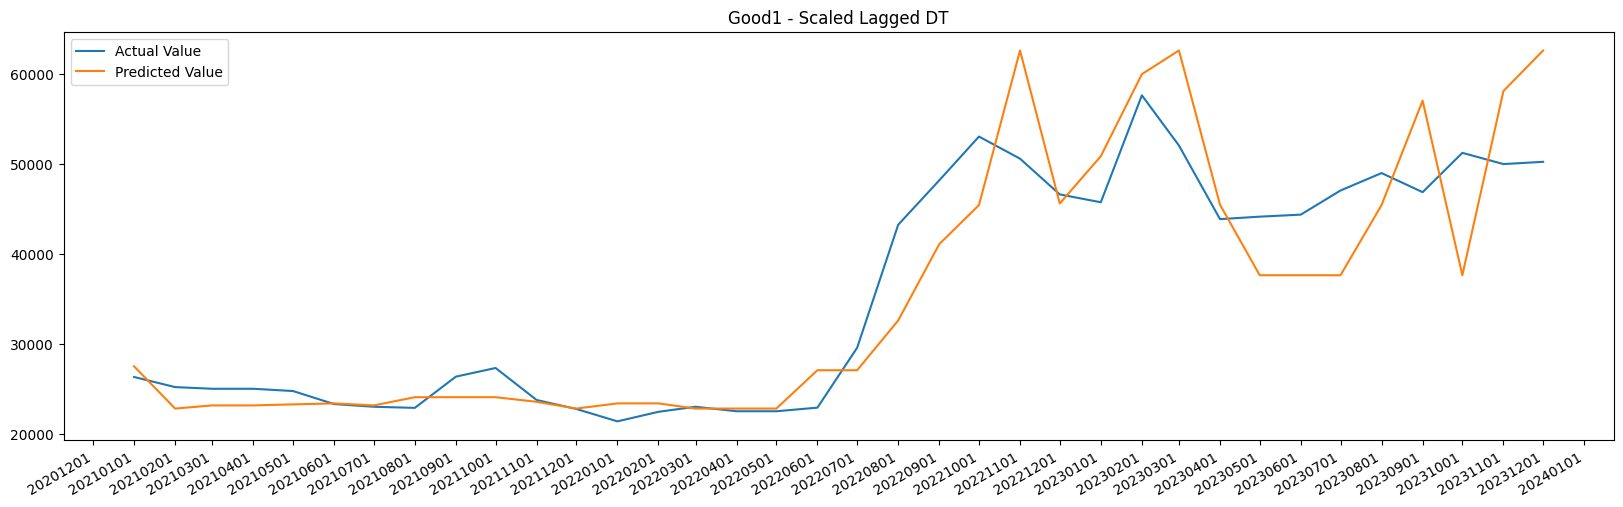

C:\Users\Asus\AppData\Local\Temp\ipykernel_11324\490034457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


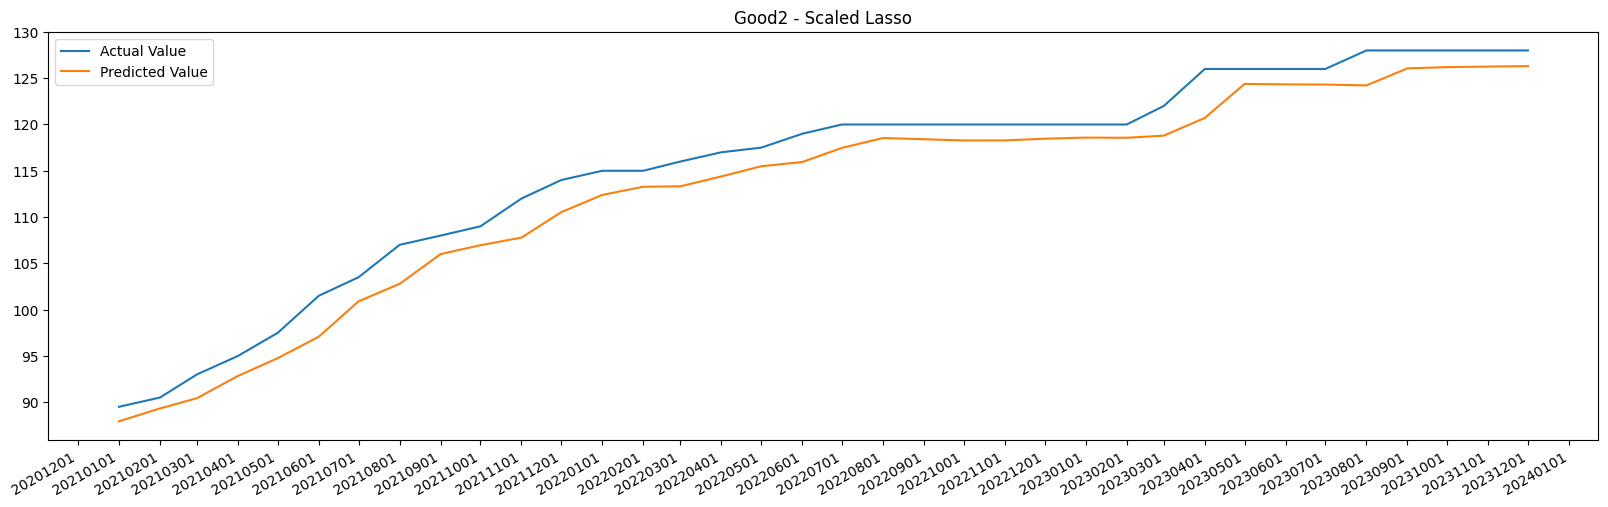

C:\Users\Asus\AppData\Local\Temp\ipykernel_11324\490034457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


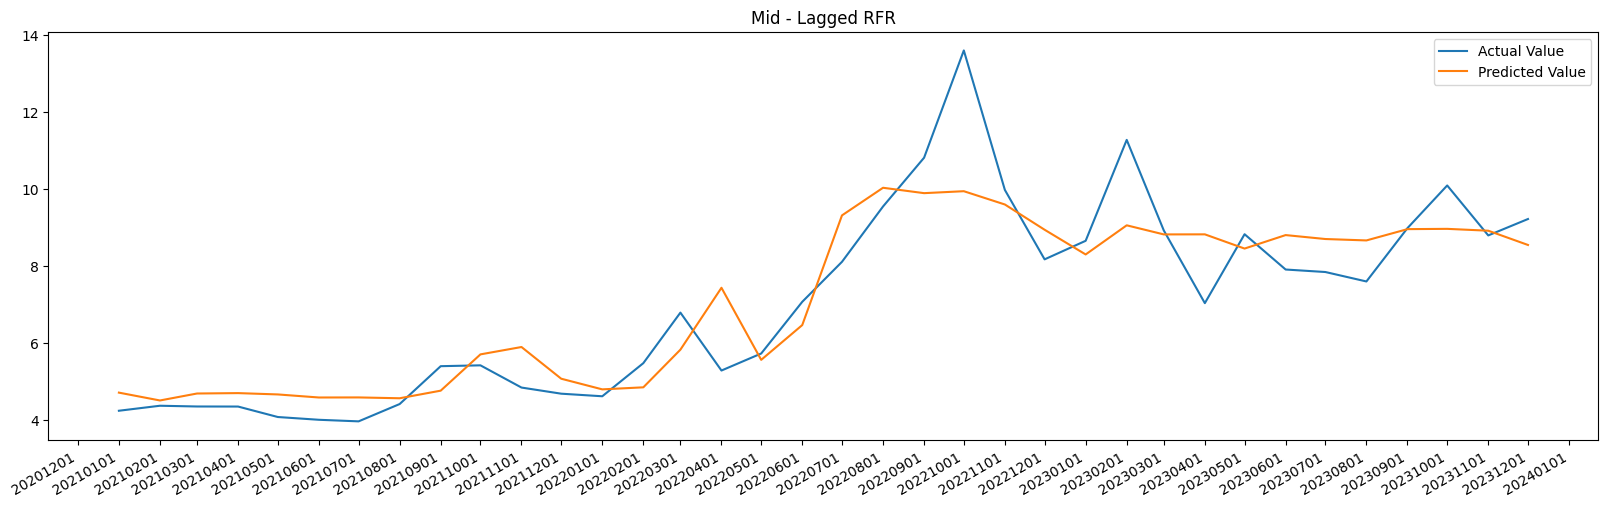

C:\Users\Asus\AppData\Local\Temp\ipykernel_11324\490034457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


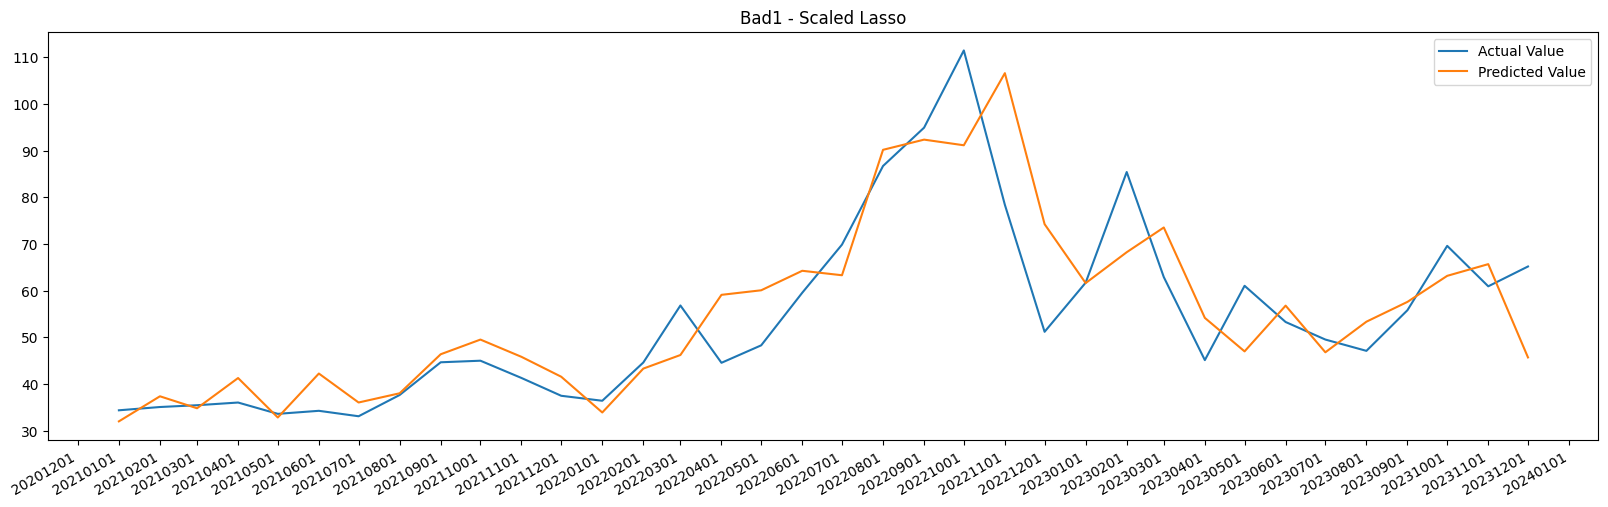

C:\Users\Asus\AppData\Local\Temp\ipykernel_11324\490034457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


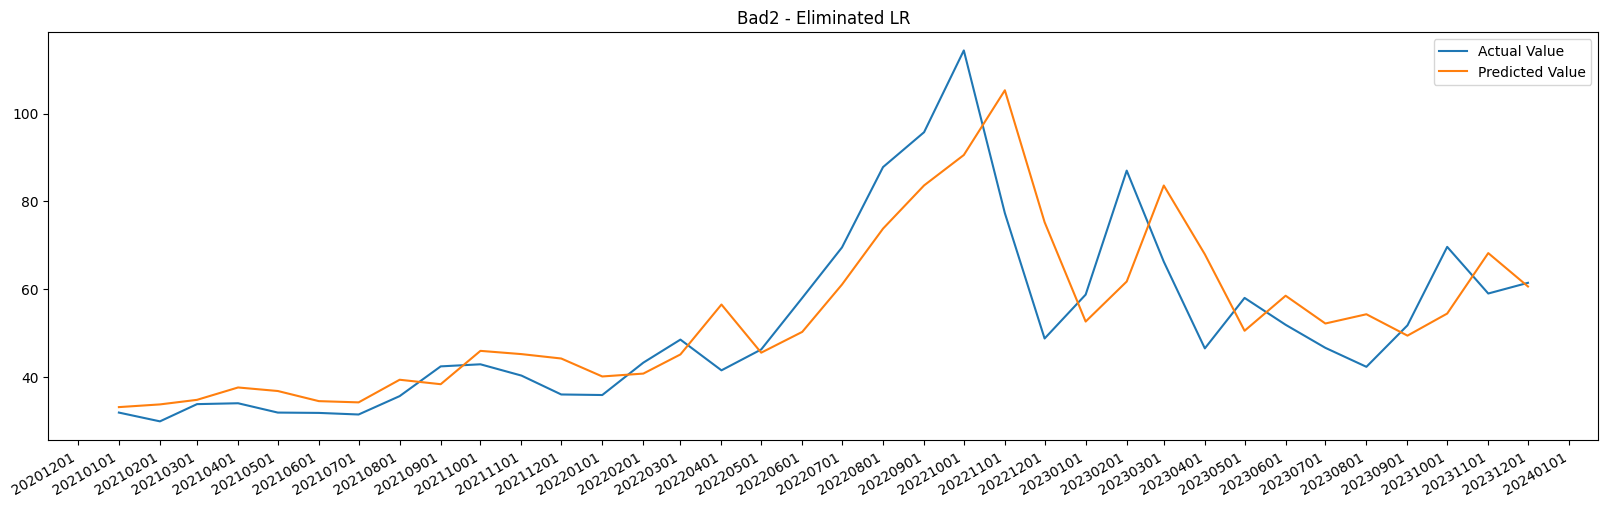

In [54]:
# plot a graph of the best model for each target column that show the prediction and the actual value
#x axis is the index of the testing data
#y axis is the actual value and the predicted value
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_best_model(best_model, y_test, predictions, title):
    X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')
    plt.figure(figsize=(20,6))
    plt.plot(X_test['Datetime'], y_test, label='Actual Value')
    plt.plot(X_test['Datetime'], predictions[best_model], label='Predicted Value')
    plt.title(title)
    plt.legend()
     # Format the dates on the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    plt.show()

#plot the best of the best model for each target column
#if the best model is from non-lagged data, plot the non-lagged data
#if the best model is from lagged data, plot the lagged data
if best_of_the_best['Good1'] in good1_predictions:
    plot_best_model(best_of_the_best['Good1'], good1_y_test, good1_predictions, f"Good1 - {best_of_the_best['Good1']}")
else:
    plot_best_model(best_of_the_best['Good1'], good1_y_lag1_test, good1_lag1_predictions, f"Good1 - {best_of_the_best['Good1']}")

if best_of_the_best['Good2'] in good2_predictions:
    plot_best_model(best_of_the_best['Good2'], good2_y_test, good2_predictions, f"Good2 - {best_of_the_best['Good2']}")
else:
    plot_best_model(best_of_the_best['Good2'], good2_y_lag1_test, good2_lag1_predictions, f"Good2 - {best_of_the_best['Good2']}")

if best_of_the_best['Mid'] in mid_predictions:
    plot_best_model(best_of_the_best['Mid'], mid_y_test, mid_predictions, f"Mid - {best_of_the_best['Mid']}")
else:
    plot_best_model(best_of_the_best['Mid'], mid_y_lag1_test, mid_lag1_predictions, f"Mid - {best_of_the_best['Mid']}")

if best_of_the_best['Bad1'] in bad1_predictions:
    plot_best_model(best_of_the_best['Bad1'], bad1_y_test, bad1_predictions, f"Bad1 - {best_of_the_best['Bad1']}")
else:
    plot_best_model(best_of_the_best['Bad1'], bad1_y_lag1_test, bad1_lag1_predictions, f"Bad1 - {best_of_the_best['Bad1']}")

if best_of_the_best['Bad2'] in bad2_predictions:
    plot_best_model(best_of_the_best['Bad2'], bad2_y_test, bad2_predictions, f"Bad2 - {best_of_the_best['Bad2']}")
else:
    plot_best_model(best_of_the_best['Bad2'], bad2_y_lag1_test, bad2_lag1_predictions, f"Bad2 - {best_of_the_best['Bad2']}")



In [56]:
# write an csv file
# first colume is the time series, this is first column of the X_test
# second column is the actual value, this is the y_test
# third column is the predicted value, this is the y_pred
# fourth column is the accuracy, this is the accuracy
# fifth column is the average accuracy, this is the avg_accuracy

import csv

def write_csv(y_test, y_pred, ind_acc, avg_acc, filename):
    with open(filename, 'w', newline='') as file:
        X_test_local = X_test.set_index('Unnamed: 0')
        writer = csv.writer(file)
        writer.writerow(["Time Series", "Target Value", "Predicted Value", "Accuracy", "Average Accuracy"])
        for i in range(len(y_test)):
            if i == 0:
                writer.writerow([X_test_local.index[i], y_test.iloc[i], y_pred[i], ind_acc.loc[361+i], avg_acc])
            else:
                writer.writerow([X_test_local.index[i], y_test.iloc[i], y_pred[i], ind_acc.loc[361+i], ""])

if best_of_the_best['Good1'] in good1_predictions:
    write_csv(good1_y_test, good1_predictions[best_of_the_best['Good1']], good1_ind_acc[best_of_the_best['Good1']], good1_avg_acc[best_of_the_best['Good1']], 'good1.csv')
else:
    write_csv(good1_y_lag1_test, good1_lag1_predictions[best_of_the_best['Good1']], good1_lag1_ind_acc[best_of_the_best['Good1']], good1_lag1_avg_acc[best_of_the_best['Good1']], 'good1.csv')

if best_of_the_best['Good2'] in good2_predictions:
    write_csv(good2_y_test, good2_predictions[best_of_the_best['Good2']], good2_ind_acc[best_of_the_best['Good2']], good2_avg_acc[best_of_the_best['Good2']], 'good2.csv')
else:
    write_csv(good2_y_lag1_test, good2_lag1_predictions[best_of_the_best['Good2']], good2_lag1_ind_acc[best_of_the_best['Good2']], good2_lag1_avg_acc[best_of_the_best['Good2']], 'good2.csv')

if best_of_the_best['Mid'] in mid_predictions:
    write_csv(mid_y_test, mid_predictions[best_of_the_best['Mid']], mid_ind_acc[best_of_the_best['Mid']], mid_avg_acc[best_of_the_best['Mid']], 'mid.csv')
else:
    write_csv(mid_y_lag1_test, mid_lag1_predictions[best_of_the_best['Mid']], mid_lag1_ind_acc[best_of_the_best['Mid']], mid_lag1_avg_acc[best_of_the_best['Mid']], 'mid.csv')

if best_of_the_best['Bad1'] in bad1_predictions:
    write_csv(bad1_y_test, bad1_predictions[best_of_the_best['Bad1']], bad1_ind_acc[best_of_the_best['Bad1']], bad1_avg_acc[best_of_the_best['Bad1']], 'bad1.csv')
else:
    write_csv(bad1_y_lag1_test, bad1_lag1_predictions[best_of_the_best['Bad1']], bad1_lag1_ind_acc[best_of_the_best['Bad1']], bad1_lag1_avg_acc[best_of_the_best['Bad1']], 'bad1.csv')

if best_of_the_best['Bad2'] in bad2_predictions:
    write_csv(bad2_y_test, bad2_predictions[best_of_the_best['Bad2']], bad2_ind_acc[best_of_the_best['Bad2']], bad2_avg_acc[best_of_the_best['Bad2']], 'bad2.csv')
else:
    write_csv(bad2_y_lag1_test, bad2_lag1_predictions[best_of_the_best['Bad2']], bad2_lag1_ind_acc[best_of_the_best['Bad2']], bad2_lag1_avg_acc[best_of_the_best['Bad2']], 'bad2.csv')    